In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Vector-borne model with susceptible and infected hosts and vectors in a single population scenario, showing the effect of  various interventions done at different time points.

For more information on how each intervention function works, check out the documentation for each function fed into `newIntervention()` in the README file.

Simulating time: 50.27757255783274, event: CONTACT_HOST_VECTOR
Simulating time: 80.50213139313219, event: CONTACT_VECTOR_HOST
Simulating time: 104.3707962756865, event: RECOVER_VECTOR
Simulating time: 116.51235912776875, event: CONTACT_VECTOR_HOST
Simulating time: 128.82933495934486, event: RECOVER_VECTOR
Simulating time: 142.05905156760926, event: CONTACT_HOST_VECTOR
Simulating time: 155.1893972199801, event: CONTACT_VECTOR_HOST
Simulating time: 167.32776220445058, event: RECOVER_VECTOR
Simulating time: 179.9215600971325, event: RECOVER_HOST
Simulating time: 192.72891892549893, event: CONTACT_VECTOR_HOST
Simulating time: 205.65139604315692, event: CONTACT_VECTOR_HOST
Simulating time: 217.22085470518283, event: CONTACT_HOST_VECTOR
Simulating time: 229.14787358344077, event: CONTACT_VECTOR_HOST
Simulating time: 240.7589496199457, event: CONTACT_HOST_VECTOR
Simulating time: 253.1284386813081, event: RECOVER_VECTOR
Simulating time: 271.45181799670144, event: RECOVER_VECTOR
Simulating time

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19067088127136234s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.023819446563720703s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.03228878974914551s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.029079675674438477s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.05

...file saved.
1 / 4 genotypes processed.
2 / 4 genotypes processed.
3 / 4 genotypes processed.
4 / 4 genotypes processed.


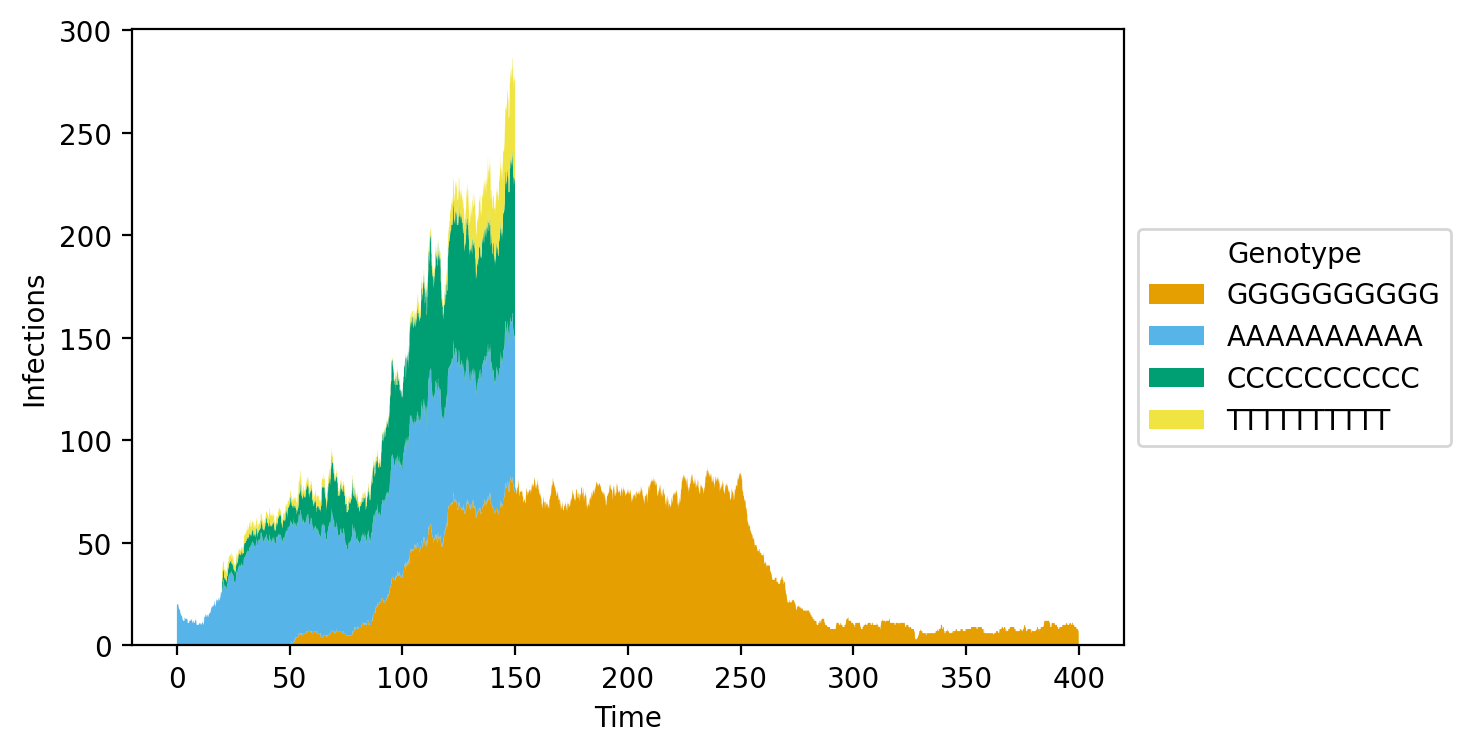

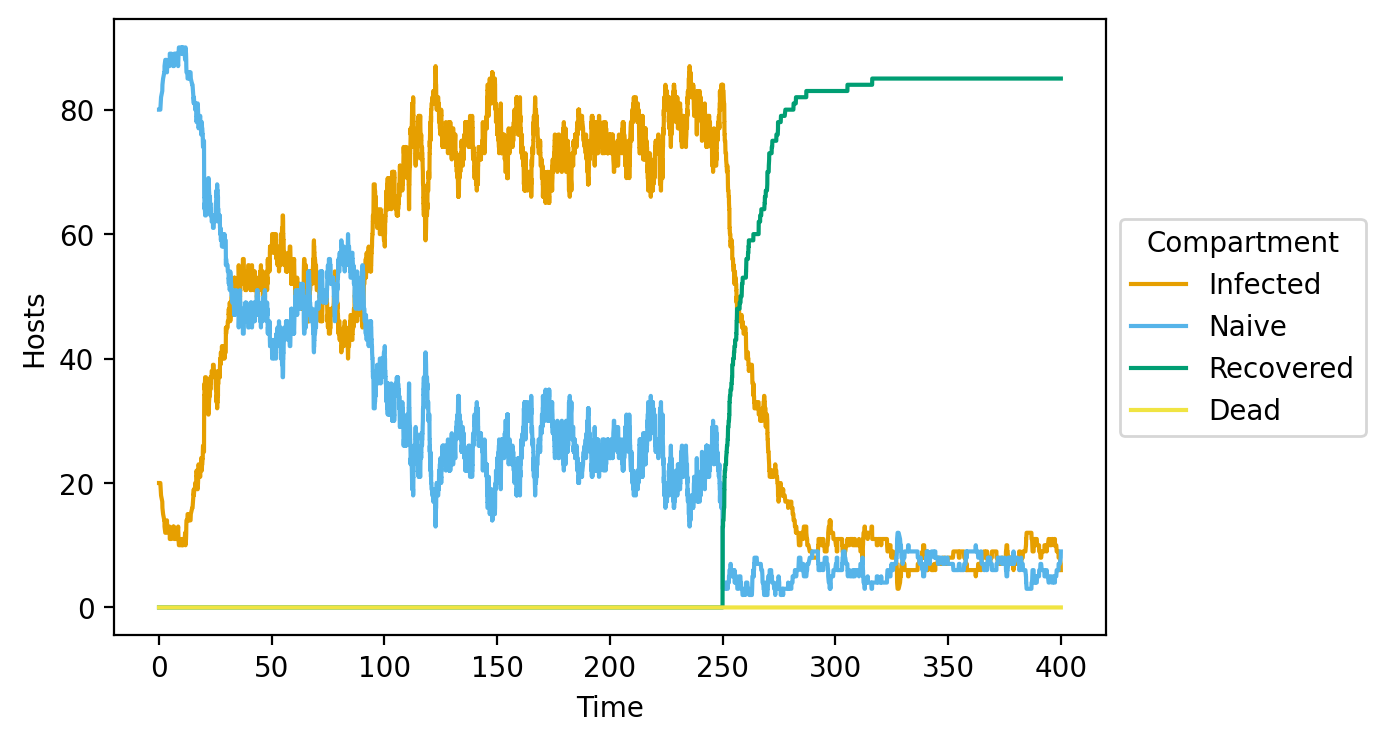

In [2]:
model = Model()

In [ ]:
model.newSetup('my_setup',preset='vector-borne')

In [ ]:
model.newSetup(
    'my_setup_2', contact_rate_host_vector=4e-1, preset='vector-borne'
    )
    # We make a second setup with the same parameters, but duplicate the contact
    # rate.

model.newPopulation('my_population','my_setup', num_hosts=100, num_vectors=100)
model.addPathogensToHosts( 'my_population',{'AAAAAAAAAA':20} )

model.newIntervention(
    20, 'addPathogensToHosts',
    [ 'my_population', {'TTTTTTTTTT':5, 'CCCCCCCCCC':5, } ]
    )
    # At time 20, adds pathogens of genomes TTTTTTTTTT and CCCCCCCCCC to 5
    # random hosts each.

model.newIntervention( 50, 'addVectors', [ 'my_population', 10 ] )
    # At time 50, adds 10 healthy vectors to population.
model.newIntervention(
    50, 'newVectorGroup',
    [ 'my_population', '10_new_vectors', 10, 'healthy' ]
    )
    # At time 50, selects 10 healthy vectors from population 'my_population'
    # and stores them under the group ID '10_new_vectors'.
model.newIntervention(
    50, 'addPathogensToVectors',
    [ 'my_population', {'GGGGGGGGGG':10}, '10_new_vectors' ]
    )
    # At time 50, adds pathogens of genomes GGGGGGGGGG to 10
    # random hosts in the '10_new_vectors' group (so, all 10 of them).
    # The last '10_new_vectors' argument specifies which group to sample
    # from (if not specified, sampling occurs from whole population).

model.newIntervention( 100, 'setSetup', [ 'my_population', 'my_setup_2' ] )
    # At time 100, changes the parameters of my_population to those in
    # my_setup_2, with twice the contact rate.

model.newIntervention(
    150, 'newHostGroup',
    [ 'my_population', 'treated_hosts', -1, 'infected' ]
    )
    # At time 150, selects 100% of infected hosts and stores them under the
    # group ID 'treated_hosts'. The third argument selects all hosts available
    # when set to -1, as above.
model.newIntervention(
    150, 'newVectorGroup',
    [ 'my_population', 'treated_vectors', -1, 'infected' ]
    )
    # At time 150, selects 100% of infected vectors and stores them under the
    # group ID 'treated_vectors'. The third argument selects all vectors
    # available when set to -1, as above.
model.newIntervention(
    150, 'treatHosts',
    [ 'my_population', 1, 'GGGGGGGGGG', 'treated_hosts' ]
    )
    # At time 150, treat 100% of the "treated_hosts" population with a treatment
    # that kills pathogens unless they contain a 'GGGGGGGGGG' sequence in their
    # genome.
model.newIntervention(
    150, 'treatVectors',
    [ 'my_population', 1, 'GGGGGGGGGG', 'treated_vectors' ]
    )
    # At time 150, treat 100% of the "treated_vectors" population with a
    # treatment that kills pathogens unless they contain a 'GGGGGGGGGG' sequence
    # in their genome.

model.newIntervention(
    250, 'newHostGroup',
    [ 'my_population', 'vaccinated', 0.85, 'any' ]
    )
    # At time 250, selects 85% of random hosts and stores them under the group
    # ID 'vaccinated'. They may be healthy or infected.
model.newIntervention(
    250, 'protectHosts',
    [ 'my_population', 1, 'GGGGGGGGGG', 'vaccinated' ]
    )
# model.newIntervention( 250, model.protectHosts, [ 'my_population', 1, 'C', 'vaccinated' ] )
# model.newIntervention( 250, model.protectHosts, [ 'my_population', 1, 'T', 'vaccinated' ] )
    # At time 250, protects 100% of the vaccinated group from pathogens
    # with a 'GGGGGGGGGG' sequence in their genome.

output = model.run(0,400)
data = model.saveToDataFrame('intervention_examples.csv')
graph = model.compositionPlot( 'intervention_examples_composition.png', data )
    # Create a plot to track pathogen genotypes across time.
graph = model.compartmentPlot('intervention_examples_compartments.png', data)
    # Also generate a normal compartment plot. Notice the total number of
    # infections in the composition plot can exceed the number of infected hosts
    # in the compartment plot. This happens because a single host infected by
    # multiple genotypes is counted twice in the former, but not the latter.